# Generate example data 

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Simple simulation of a random hunter: 
- food moves randomly (random walk with step size distributed normally)
- hunter moves randomly + bias, which depends on distance to food. The detection or transfer function is a [sigmoidal function](http://mathworld.wolfram.com/SigmoidFunction.html) so that half-strength detection is at `d0`.
- food gets to move more frequently (probability of move `pB > pA`) 

In [231]:
import numpy as np

Nmax = 1500

# positions
xA = []
xB = []

# times of moves
tA = []
tB = []

# current distance
distances = []


pA = 0.4
pB = 1 - pA

# step size
dx = 1 

# "detection distance" 
d0_default = 10*dx

# capture 
r_capture = 0.5*dx

def transfer(d, d0=0, T=1):
    """-Sigmoidal shifted by d0.
    
    Half-strength detection at d0
    """
    return 1 - 1/(1 + np.exp(-(d-d0)/T))

def bias(x, y, d0=d0_default, T=1, db=dx):
    delta = x - y
    d = np.linalg.norm(delta)
    delta0 = delta/d
    return -db*transfer(d, d0=d0, T=T) * delta0
    
# starting position
# hunter A at origin
xA.append(np.array([0, 0]))
tA.append(0)

# food B within ~D0
xB.append(np.random.normal(loc=0, scale=2*d0_default, size=2))
tB.append(0)   
    
for t in range(1, Nmax):
    if np.random.random() <= pA:
        # A moves
        x = np.random.normal(loc=xA[-1], scale=dx, size=2)
        b = bias(x, xB[-1])
        xA.append(x + b)  
        tA.append(t)
    else:
        # B moves
        x = np.random.normal(loc=xB[-1], scale=dx, size=2)
        xB.append(x)
        tB.append(t)
    dist = np.linalg.norm(xB[-1] - xA[-1])
    distances.append([t, dist])
    if dist <= r_capture:
        print("Hunter found food after {iter} iterations.".format(iter=t))
        captured = True
        break
else:
    print("Food escaped!")
    captured = False

        
xA = np.array(xA).T
xB = np.array(xB).T
tA = np.array(tA)
tB = np.array(tB)

distances = np.array(distances).T

Hunter found food after 946 iterations.


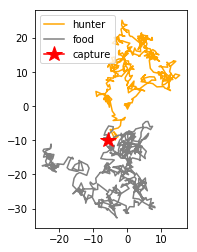

In [232]:
plt.plot(xA[0], xA[1], color="orange", label="hunter")
plt.plot(xA[0, 0], xA[1, 0], color="orange", marker="v")
plt.plot(xB[0], xB[1], color="gray", label="food")
plt.plot(xB[0, 0], xB[1, 0], color="gray", marker="o")
if captured:
    plt.plot(xA[0, -1], xA[1, -1], color="red", marker="*", markersize=16, label="capture")
plt.legend(loc="best")
ax = plt.gca()
ax.set_aspect("equal")

The starting points are indicated by a triangle for the hunter and a circle for the food.

If capture occured, it is indicated by a red star.

The distance between hunter and prey:

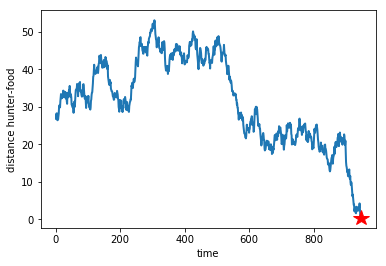

In [233]:
plt.plot(distances[0], distances[1], lw=2)
plt.xlabel("time")
plt.ylabel("distance hunter-food")
if captured:
    plt.plot(distances[0, -1], distances[1, -1], color="red", marker="*", markersize=16, label="capture")

#### Export data 

Make things more complicated and mix the data.

In [156]:
rA = np.array(list(zip(tA, xA[0], xA[1], ["hunter"]*len(tA))), 
            dtype=[('t', int), ('x', float), ('y', float), ('name', 'U8')])
rB = np.array(list(zip(tB, xB[0], xB[1], ["food"]*len(tB))), 
            dtype=[('t', int), ('x', float), ('y', float), ('name', 'U8')])

Sorted by time and name:

In [157]:
combined = np.sort(np.concatenate([rA, rB]), axis=0, order=["t", "name"])

In [158]:
combined[:4]

array([(0, -87.89424146, -14.65169536, 'food'),
       (0,   0.        ,   0.        , 'hunter'),
       (1, -87.23009162, -15.53286898, 'food'),
       (2,  -1.08562341,  -1.15109598, 'hunter')],
      dtype=[('t', '<i8'), ('x', '<f8'), ('y', '<f8'), ('name', '<U8')])

In [159]:
combined[-4:]

array([(1041, -72.768156  , -3.14258932, 'hunter'),
       (1042, -75.28653583, -5.10019787, 'food'),
       (1043, -73.91185505, -3.75238018, 'food'),
       (1044, -73.06195928, -2.7524548 , 'food')],
      dtype=[('t', '<i8'), ('x', '<f8'), ('y', '<f8'), ('name', '<U8')])

In [165]:
np.savetxt("the_hunt.dat", combined, fmt=["%d", "%g", "%g", "%s"], 
           header="stochastic hunter-prey simulation\nt x y name")

## Detection function 

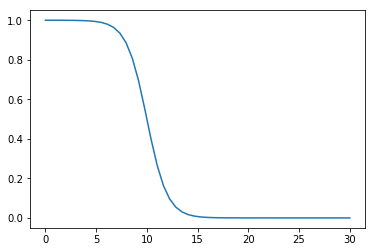

In [225]:
x = np.linspace(0, 30*dx)
plt.plot(x, transfer(x, d0=10*dx))